# Lecture 4.2: Comparing Two Groups

### 🧠 Learning Objectives
- Perform t-tests and chi-square tests
- Compare means and proportions between groups
- Interpret test results and confidence intervals
- Apply these tests to epidemiological data

## 🔧 Setup and Load Data

In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import tableone

In [44]:
# Load OHIE and Framingham datasets
ohie = pd.read_csv("../Data/OHIE_12m.csv")
framingham = pd.read_csv("../Data/frmgham2.csv")

## 🎯 1. Comparing Means: t-test example with Framingham

##### Describe data

In [45]:
tableone.TableOne(framingham, columns = ['SYSBP'], groupby= 'CURSMOKE')

Grouped by CURSMOKE                                          
                              Missing       Overall             0             1
n                                             11627          6598          5029
SYSBP, mean (SD)                    0  136.3 (22.8)  139.1 (23.2)  132.6 (21.7)

Plot the Group Means

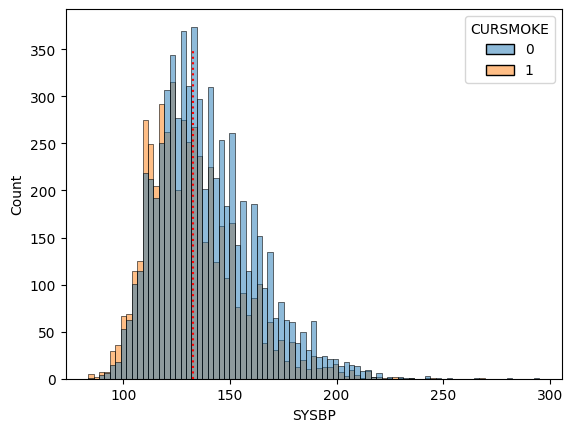

In [76]:
# Plot the group distributions with means
sns.histplot(data = framingham, hue = 'CURSMOKE', x = 'SYSBP')
plt.plot([132.6, 132.6],[0,350], 'r:')

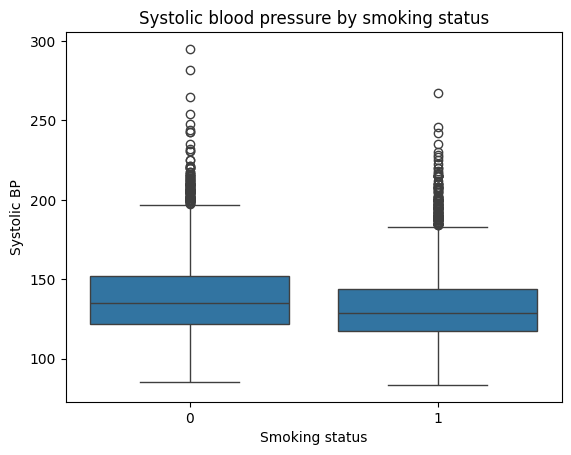

In [46]:
sns.boxplot(data=framingham, x="CURSMOKE", y="SYSBP")
plt.title("Systolic blood pressure by smoking status")
plt.xlabel("Smoking status")
plt.ylabel("Systolic BP")
plt.show()

## Statistical test

In [47]:
# Drop missing data
framingham_clean = framingham.dropna(subset=["SYSBP", "CURSMOKE"])

# Split into groups
group0 = framingham_clean[framingham_clean["CURSMOKE"] == 0]["SYSBP"]
group1 = framingham_clean[framingham_clean["CURSMOKE"] == 1]["SYSBP"]

### Types of t-tests:

- Independent samples t-test
- One-sample t-test
- Paired-sample t-test (= one-sample on difference scores)

In [48]:
# Perform t-test (independent samples)
ttest_result = stats.ttest_ind(group0, group1)

In [49]:
# Inspect results
ttest_result

TtestResult(statistic=np.float64(15.329366471435574), pvalue=np.float64(1.5867101569518516e-52), df=np.float64(11625.0))

In [50]:
# Print results
print('t(%i) = %.2f, p = %.4f'%(ttest_result.df, ttest_result.statistic, ttest_result.pvalue))

t(11625) = 15.33, p = 0.0000


Interpretation / report:
An independent samples t-test revealed that Smokers (M = 132.6, SD = 21.7) had significantly lower systolic blood pressure than non-smokers (M = 139.1, SD = 23.2), t(11625) = 15.33, p < 0.001. (Good practice to add effect size such as Cohen's _d_.)

## 🎯 2. Comparing Proportions: Chi-square test

Is depression (PHQ2 > cutoff) more common among people who were not selected than among people who were selected?

Describe data

In [82]:
tableone.TableOne(data = ohie, columns = ['PHQ2_cutoff'], groupby = 'treatment')

Grouped by treatment                                       
                                      Missing      Overall Not selected     Selected
n                                                     4000         1993         2007
PHQ2_cutoff, n (%) False                       2695 (67.4)  1322 (66.3)  1373 (68.4)
                   None                          104 (2.6)     45 (2.3)     59 (2.9)
                   True                        1201 (30.0)   626 (31.4)   575 (28.6)

Extract test data: contingency table

In [78]:
# Contingency table
ctab = pd.crosstab(ohie["treatment"], ohie["PHQ2_cutoff"])
print(ctab)

PHQ2_cutoff   False  None  True
treatment                      
Not selected   1322    45   626
Selected       1373    59   575


Chi-square test:

In [79]:
# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)
print('chi2 (%i) = %.2f, p = %.4f'%(dof, chi2, p))

chi2 (2) = 4.97, p = 0.0835


Reporting result:

A chi-square test of independence showed a non-significant association between treatment and PHQ-2 depression, $\chi^{2}$(1) = 3.01, p = 0.083.

# Another example: In Framingham, test whether diabetes is associated with gender

In [71]:
# Contingency table
ctab = pd.crosstab(framingham["SEX"], framingham["DIABETES"])
print(ctab)

DIABETES     0    1
SEX                
1         4769  253
2         6328  277


In [75]:
# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)
print(f"Chi2: {chi2:.2f}, dof: {dof:.0f}, p-value: {p:.4f}")

Chi2: 4.48, dof: 1, p-value: 0.0343


A chi-square test of independence showed a significant association between sex and diabetes, $\chi^{2}$(1) = 4.48, p = 0.034.